In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

from datetime import date, timedelta
today = date.today()
today
end_date = today.strftime("%Y-%m-%d")
end_date
d1 = date.today() - timedelta(days=360*10) #for last 5 years
d1
start_date = d1.strftime("%Y-%m-%d")
start_date
data = yf.download(tickers = "GOOGL",
                  start = start_date,
                  end = end_date)
data.shape

[*********************100%***********************]  1 of 1 completed


(2480, 6)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-29,22.144646,22.392893,22.044294,22.078829,22.078829,75600324
2013-07-30,22.158659,22.412663,22.043795,22.295296,22.295296,70153776
2013-07-31,22.347097,22.435184,22.176678,22.215965,22.215965,86853060
2013-08-01,22.397396,22.636387,22.397396,22.628128,22.628128,85450464
2013-08-02,22.608608,22.697699,22.543043,22.686937,22.686937,68487444


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2480 entries, 2013-07-29 to 2023-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2480 non-null   float64
 1   High       2480 non-null   float64
 2   Low        2480 non-null   float64
 3   Close      2480 non-null   float64
 4   Adj Close  2480 non-null   float64
 5   Volume     2480 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.6 KB


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-29,22.144646,22.392893,22.044294,22.078829,22.078829,75600324
1,2013-07-30,22.158659,22.412663,22.043795,22.295296,22.295296,70153776
2,2013-07-31,22.347097,22.435184,22.176678,22.215965,22.215965,86853060
3,2013-08-01,22.397396,22.636387,22.397396,22.628128,22.628128,85450464
4,2013-08-02,22.608608,22.697699,22.543043,22.686937,22.686937,68487444


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2480 non-null   datetime64[ns]
 1   Open       2480 non-null   float64       
 2   High       2480 non-null   float64       
 3   Low        2480 non-null   float64       
 4   Close      2480 non-null   float64       
 5   Adj Close  2480 non-null   float64       
 6   Volume     2480 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.8 KB


In [8]:
df = df.drop(['Adj Close'],axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2013-07-29,22.144646,22.392893,22.044294,22.078829,75600324
1,2013-07-30,22.158659,22.412663,22.043795,22.295296,70153776
2,2013-07-31,22.347097,22.435184,22.176678,22.215965,86853060
3,2013-08-01,22.397396,22.636387,22.397396,22.628128,85450464
4,2013-08-02,22.608608,22.697699,22.543043,22.686937,68487444


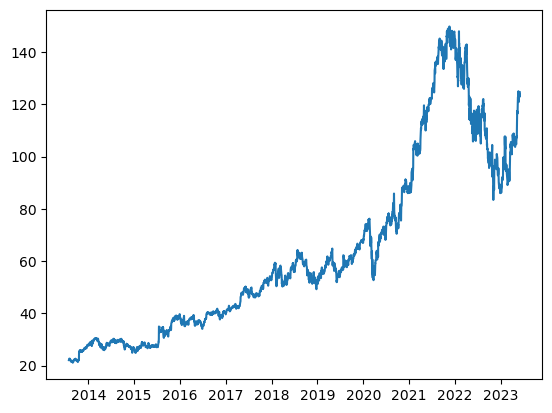

In [9]:
plt.plot(df.Date,df.Close)

In [10]:
movin_avg = df.Close.rolling(100).mean()
movin_avg

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2475    101.7569
2476    102.1128
2477    102.4795
2478    102.8433
2479    103.2098
Name: Close, Length: 2480, dtype: float64

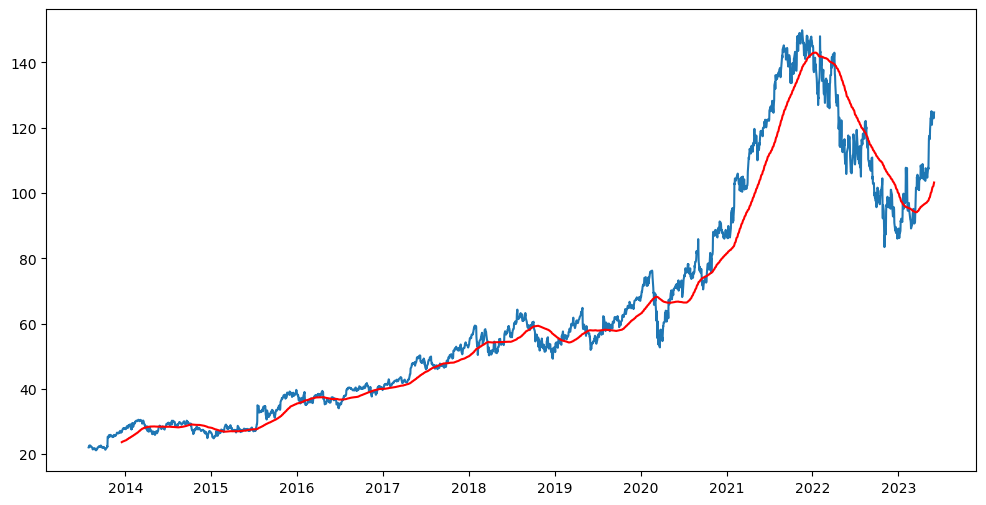

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,movin_avg,'r')

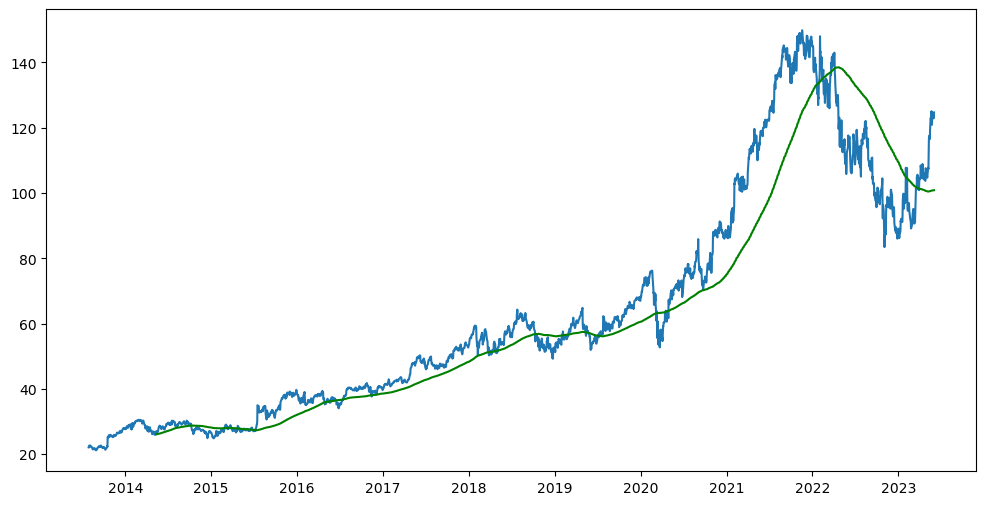

In [12]:
movin_avg_200 = df.Close.rolling(200).mean()
movin_avg
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,movin_avg_200,'g')

In [49]:
df.Date.shape,df.Close.shape

((2480,), (2480,))

Text(0.5, 1.0, 'GOOGLE Stock Price')

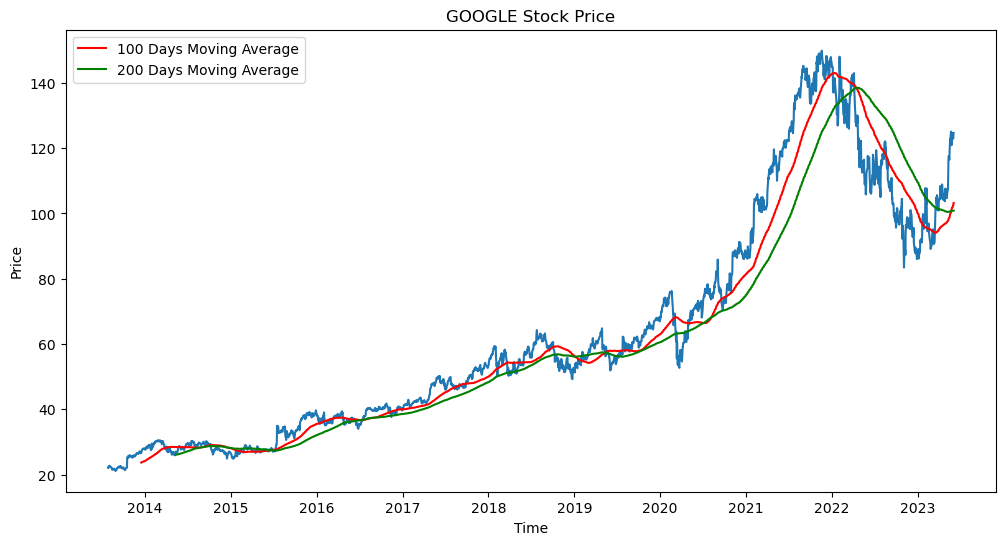

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,movin_avg,'r',label='100 Days Moving Average')
plt.plot(df.Date,movin_avg_200,'g',label='200 Days Moving Average')
plt.legend()
plt.xlabel ('Time')
plt.ylabel ('Price')
plt.title ('GOOGLE Stock Price')

In [14]:
df.shape

(2480, 6)

In [15]:
# Spliting Data into training and Testing 

data_training = pd.DataFrame(df['Close'][0:(int(len(df)*0.70))])
data_testing = pd.DataFrame(df['Close'][(int(len(df)*0.70)):])

data_training.shape,data_testing.shape

((1736, 1), (744, 1))

In [16]:
data_training.head(),data_testing.head()

(       Close
 0  22.078829
 1  22.295296
 2  22.215965
 3  22.628128
 4  22.686937,
           Close
 1736  71.232002
 1737  72.532997
 1738  73.198997
 1739  71.635002
 1740  72.055000)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [46]:
x_train.shape

(1636, 100, 1)

In [20]:
y_train.shape

(1636,)

In [21]:
x_train.shape

(1636, 100, 1)

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units=64,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=32))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13422313289178107421
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1749391771
locality {
  bus_id: 1
  links {
  }
}
incarnation: 716583527977169740
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [27]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
import keras
import tensorflow as tf


config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.compat.v1.Session(config=config) 
keras.backend.set_session(sess)

In [29]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



In [30]:
tf.debugging.set_log_device_placement(True)

In [31]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 10s 36ms/step - loss: 0.0273
Epoch 2/50
52/52 [==============================] - 2s 32ms/step - loss: 0.0095
Epoch 3/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0088
Epoch 4/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0084
Epoch 5/50
52/52 [==============================] - 2s 32ms/step - loss: 0.0101
Epoch 6/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0074
Epoch 7/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0068
Epoch 8/50
52/52 [==============================] - 2s 32ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 2s 32ms/step - loss: 0.0062
Epoch 10/50
52/52 [==============================] - 2s 30ms/step - loss: 0.0059
Epoch 11/50
52/52 [==============================] - 2s 31ms/step - loss: 0.0059
Epoch 12/50
52/52 [==============================] - 2s 29ms/step - loss: 0.0060
Epoch 13/50
52/52 [=================

In [32]:
model.save('keras_model.h5')

In [33]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\rajab\AppData\Local\Temp\ipykernel_19596\805977344.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [34]:
final_df.head()

,Close
0,72.525002
1,72.834999
2,72.712502
3,71.639000
4,74.129997


In [35]:
input_data = scaler.fit_transform(final_df)

In [36]:
input_data.shape

(844, 1)

In [37]:
x_test = []
y_test = []
x_test.clear()
y_test.clear()
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [38]:
x_test,y_test= np.array(x_test),np.array(y_test)

In [39]:
x_test.shape,y_test.shape 

((744, 100, 1), (744,))

In [40]:
#Prediction

y_predicted = model.predict(x_test)


24/24 [==============================] - 2s 16ms/step


In [41]:
y_predicted.shape,y_test.shape

((744, 1), (744,))

In [42]:
scaler.scale_

array([0.01029527])

In [43]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

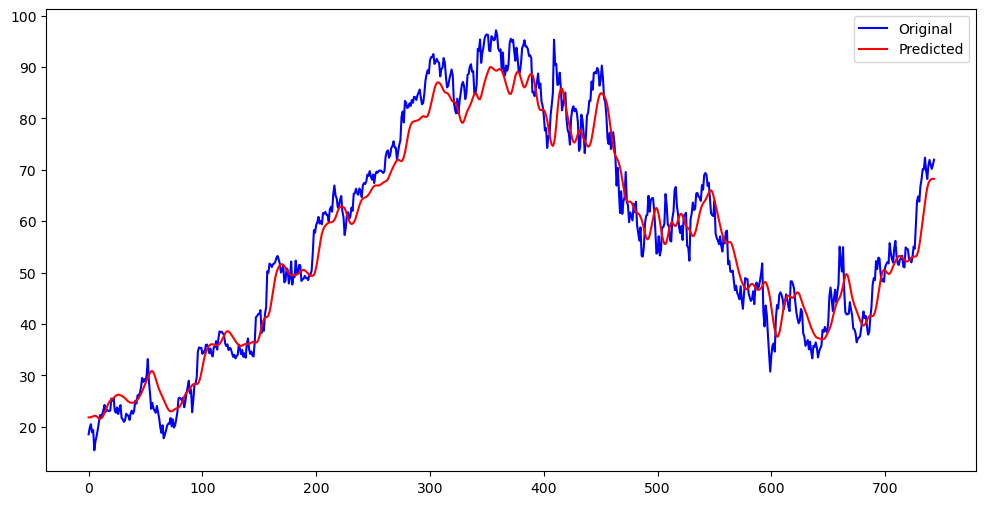

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original')
plt.plot(y_predicted,'r',label = 'Predicted')
plt.legend()

C:\Users\rajab\AppData\Local\Temp\ipykernel_19596\2013178624.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


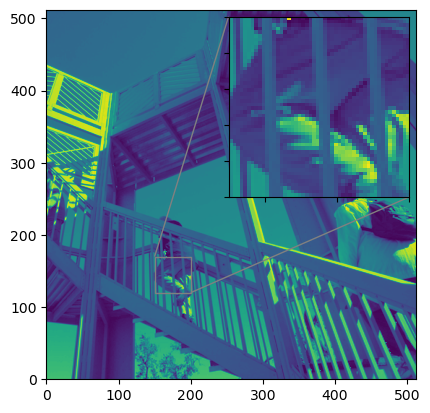

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy import misc
fig = plt.figure()
ax = fig.add_subplot(111)

image = misc.ascent()

ax.imshow(image,extent=[0,512,0,512], aspect=(1))

axins = zoomed_inset_axes(ax, 5, loc=1)
axins.imshow(image, extent=[0,512,0,512],aspect=(1))
axins.set_xlim(150, 200)
axins.set_ylim(120, 170)
plt.xticks(visible=False)
plt.yticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()